In [1]:
# %config Completer.use_jedi = True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# # Import necessary libraries
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# import pandas as pd

In [4]:
file_path = "D:\Data science\Machine Learning\housing.csv"

In [5]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Missing Data Analysis

In [10]:
## check missing values
missing_values = data.isnull().sum()

## calculate the percentage of missing data in each coloumn
missing_percentage = (missing_values/len(data))*100

## display the missing data statistic
print("missing values in each column:\n" , missing_values)
print("/nPercentage of missing data:\n" , missing_percentage)

missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
/nPercentage of missing data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [11]:
## can use data imputation to replace missing values
## but missing value is only 1% then we will drop it/remove it

# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Data exploration and Visulization

In [12]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

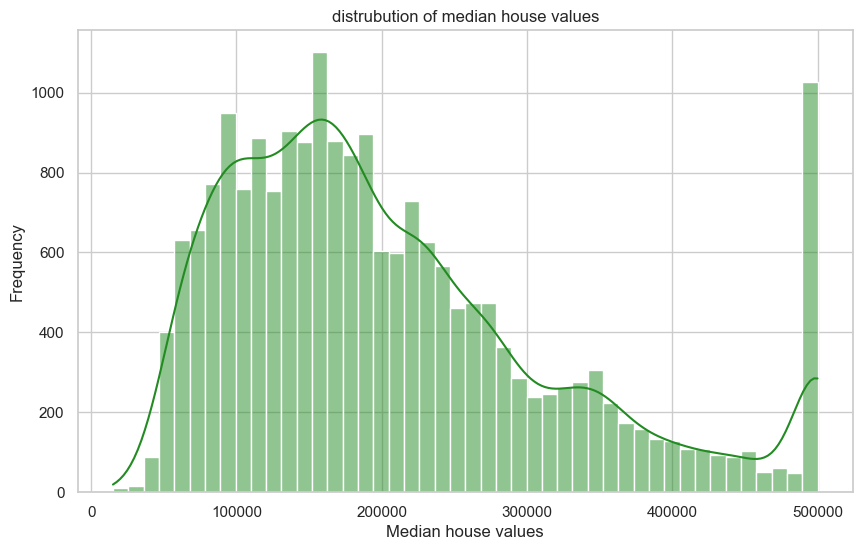

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize = (10,6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen',kde=True)
plt.title ('distrubution of median house values')
plt.ylabel('Frequency')
plt.xlabel('Median house values')
plt.show

### Using Interqualtile range to remove outliers

In [14]:
## Assusming 'Data' is your dataframe and 'median_House_values' is column of interest
Q1 = data_cleaned['median_house_value'].quantile(0.25)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
## Define the bounds for outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print(lower_bound)
print(upper_bound)
## Remove outprint(lower_bound)liers
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value']>=lower_bound)& (data_cleaned['median_house_value']<=upper_bound)]

## Check the shape of the data before & after removing outliers

print('Original data shape:',data_cleaned.shape)
print('New data shape without outliers:',data_no_outliers_1.shape)

119500.0
264700.0
145200.0
-98300.0
482500.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


In [15]:

# # Assuming you have two DataFrames: df1 and df2
# # df1 is the original dataset and df2 is the new dataset

# # Create a boolean DataFrame indicating whether each value is missing in df2 compared to df1
# missing_data = data_cleaned[~data_cleaned.isin( )].dropna()

# print("Data missing in data_no_outliers_1 compared to data_cleaned: ")
# missing_data
# sorted_df = missing_data.sort_values(by='median_house_value', ascending=True)
# sorted_df

### BoxPlot for outlier detection

Outliers in median income

<function matplotlib.pyplot.show(close=None, block=None)>

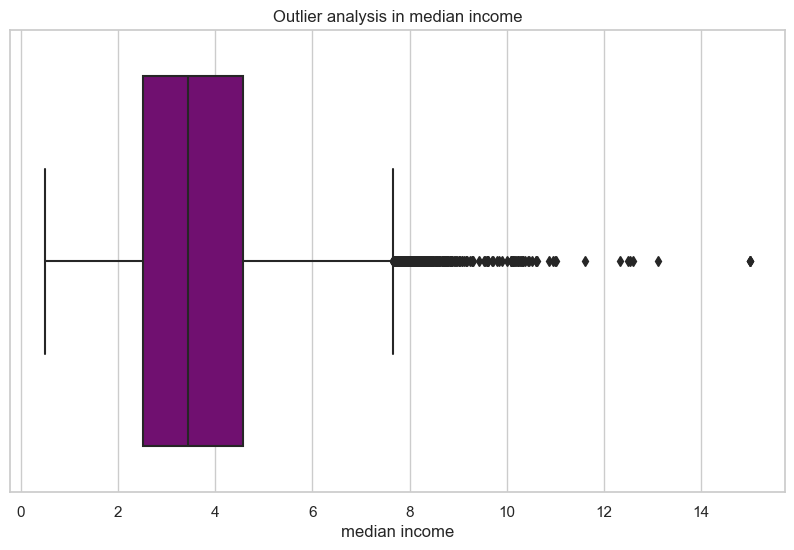

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers_1['median_income'],color = 'purple')
plt.title('Outlier analysis in median income')
plt.xlabel('median income')
plt.show

In [17]:
## Assusming 'Data' is your dataframe and 'median_House_values' is column of interest
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

## Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

## Check the shape of the data before & after removing outliers

print('Original data shape:',data_no_outliers_1.shape)
print('New data shape without outliers:',data_no_outliers_2.shape)

Original data shape: (19369, 10)
New data shape without outliers: (19026, 10)


In [18]:
data = data_no_outliers_2
data.info()
data = data.select_dtypes(include=["number"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19026 entries, 2 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19026 non-null  float64
 1   latitude            19026 non-null  float64
 2   housing_median_age  19026 non-null  float64
 3   total_rooms         19026 non-null  float64
 4   total_bedrooms      19026 non-null  float64
 5   population          19026 non-null  float64
 6   households          19026 non-null  float64
 7   median_income       19026 non-null  float64
 8   median_house_value  19026 non-null  float64
 9   ocean_proximity     19026 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Correlation Heatmap

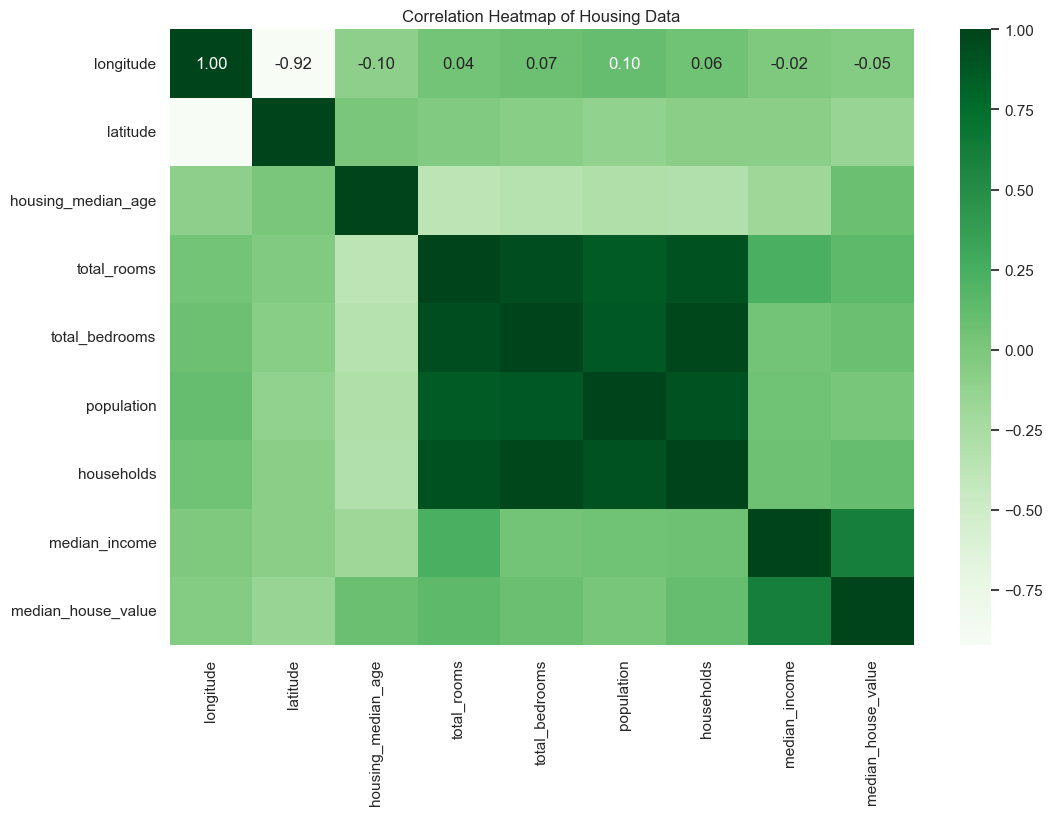

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap of Housing Data")
plt.show()

In [20]:
data = data_no_outliers_2
data= data.drop('total_bedrooms', axis =1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [21]:
for column in ['ocean_proximity']:
    print(f'unique values in {column}:', data[column].unique())

unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


### string data categorization to dummy variable

In [22]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix= 'ocean_proximity')
data = pd.concat([data.drop('ocean_proximity', axis=1),ocean_proximity_dummies],axis = 1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [23]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [24]:
# data = data.drop('ocean_proximity_ISLAND', axis =1)
# data.columns

In [25]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,0,1,0


# Splitting the Data into Train/Test

In [26]:
### define your features (independent variable) and target dependant variable

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
target =['median_house_value']
X=data[features]
y=data[target]


# Split the data into training and testing sets
# test size specify the proportion of data to be included in the test split
# random split ensure the reproducibility of your split  
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 1111)

# check the size of of splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


### Training

In [27]:
# adding constant to predictors because statsmodels' OLS doesn't include it by default (Add a new const column 1.0)
X_train_const = sm.add_constant(X_train)

# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.457e+33
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        14:27:12   Log-Likelihood:             3.3518e+05
No. Observations:               15220   AIC:                        -6.703e+05
Df Residuals:                   15207   BIC:                        -6.702e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Prediction / testing

In [28]:
# Adding constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making prediction on the test set
test_predictions = model_fitted.predict(X_test_const)

## Checking OLS assumptions

#### Assumption 1: Linearity

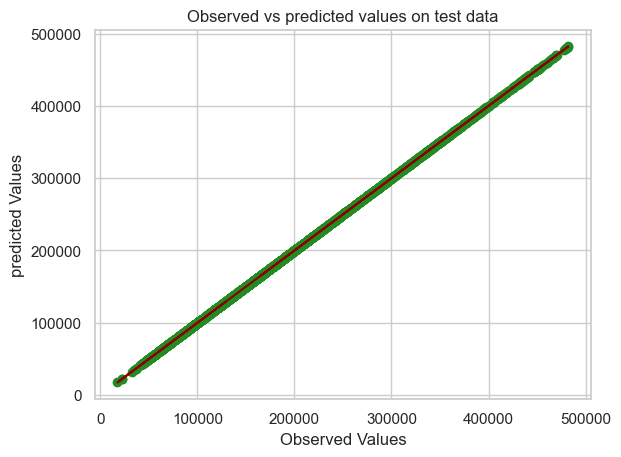

In [29]:
# Scatter plot for observed vs predicted value on test data
plt.scatter(y_test, test_predictions, color ='forestgreen')
plt.xlabel('Observed Values')
plt.ylabel('predicted Values')
plt.title('Observed vs predicted values on test data')
plt.plot(y_test, y_test,color='darkred') ## line for perfect prediction (true values)
plt.show()

### Assumption 2: Random samples

In [30]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f'the mean of residuals is : {np.round(mean_residuals,2)}') 

the mean of residuals is : -0.0


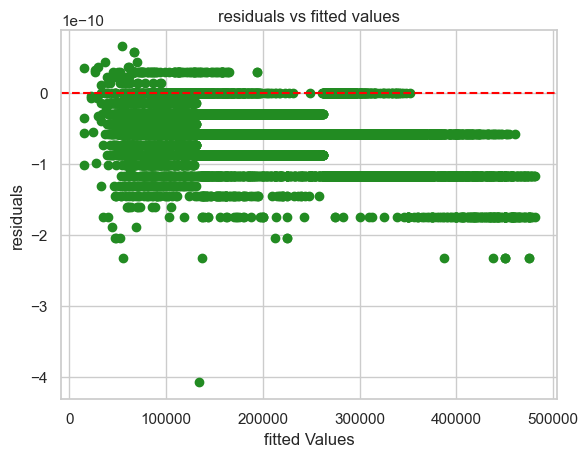

In [31]:
# plotting residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color ='forestgreen')
plt.axhline(y=0, color ='red', linestyle= '--')
plt.xlabel('fitted Values')
plt.ylabel('residuals')
plt.title('residuals vs fitted values')
plt.show()

### Assumption 3: Exogeneity 

In [32]:
# Calculate the residuals
residuals=model_fitted.resid

# Check for correlation between residuals and each predicator
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0,1]
    print(f'Correlation between residual and {column}: {np.round(corr_coefficient,2)}')

Correlation between residual and longitude: 0.4
Correlation between residual and latitude: -0.46
Correlation between residual and housing_median_age: -0.09
Correlation between residual and total_rooms: -0.05
Correlation between residual and population: -0.02
Correlation between residual and households: -0.05
Correlation between residual and median_income: -0.02
Correlation between residual and median_house_value: -0.42
Correlation between residual and ocean_proximity_<1H OCEAN: 0.34
Correlation between residual and ocean_proximity_INLAND: -0.04
Correlation between residual and ocean_proximity_ISLAND: -0.05
Correlation between residual and ocean_proximity_NEAR BAY: -0.34
Correlation between residual and ocean_proximity_NEAR OCEAN: -0.14


## Assumtion 4: Homoskedasticty

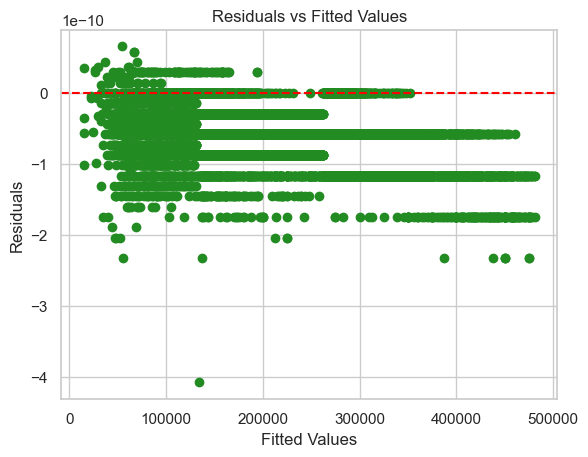

In [33]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


## Random Scatter:** If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.

## Pattern or Shape:** If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.

# Train/Test/Evaluation with Sklearn

### Scaling the data

In [34]:
from sklearn.preprocessing import StandardScaler
# Initialize the standard scalar
scaler = StandardScaler()

# fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation on same data
X_test_scaled = scaler.transform(X_test)

In [35]:
# Create and fit model
lr = LinearRegression()
lr.fit(X_train_scaled , y_train)

# make predictions on scaled test data
y_pred = lr.predict(X_test_scaled)

# calculate MSE & RMSE
mse = mean_squared_error (y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'MSE on test set: {mse}')
print(f'RMSE on test set: {rmse}')

MSE on test set: 3.0692147597435774e-21
RMSE on test set: 5.5400494219307984e-11
